In [5]:
%matplotlib inline
import readline #rpy2使うときはとりあえず入れとく。
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
from scipy import stats

Rオブジェクトの読み込み

種子数$y_{i}$の読み込み

In [8]:
robjects.r['load']('data.RData')
data = pd.Series(np.array(robjects.r['data']))

In [10]:
print data.head(3)

0    2.0
1    2.0
2    4.0
dtype: float64


データ数の確認

In [11]:
len(data)

50

要約統計

In [12]:
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
dtype: float64

データ解析で重要なことは、いろいろな方法でとにかく図示してみることです。

ヒストグラムの作成

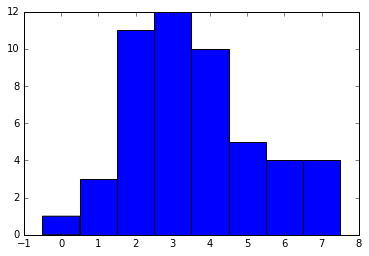

In [13]:
plt.hist(data,bins=np.arange(-0.5,8.5,1.0)) #ビンの位置を指定している。
plt.show()

標本分散の計算

In [15]:
data.var()

2.986122448979592

標本標準偏差の計算

In [16]:
print np.sqrt(data.var()),data.std()

1.72804006 1.72804006


ポアソン分布の作図

ポアソン分布が指定できるパラメータは平均値のひとつだけ

使うデータの特徴

- 1個、２個と数えることのできるデータ
- １個体の種子数の標本平均は3.56個
- 個体ごとの種子数にはばらつきがあり、ヒストグラムを描くとひと山の分布になる

In [21]:
x = np.arange(0,10)
prob = pd.Series(stats.poisson.pmf(x,3.56),index=x)
print prob

0    0.028439
1    0.101242
2    0.180211
3    0.213851
4    0.190327
5    0.135513
6    0.080404
7    0.040891
8    0.018197
9    0.007198
dtype: float64


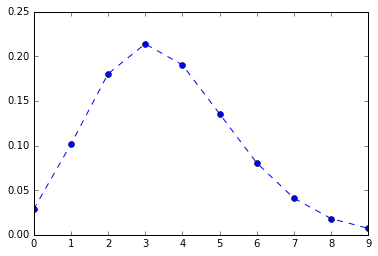

In [22]:
plt.plot(prob,'o--')
plt.show()

観測データとの重ねあわせ

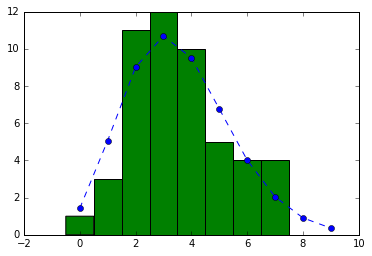

In [24]:
plt.plot(prob*50,'o--')
plt.hist(data,bins=np.arange(-0.5,8.5,1.0))
plt.show()

ポアソン分布の定義
$$p(x|\lambda) = \frac{\lambda^x \exp(-\lambda)}{x!}$$

- 確率変数は0以上の値をとる
- 確率分布の平均は$\lambda$である
- 分散と平均は等しい


先のデータにポアソン分布をフィットさせる理由は
- データが非負の整数であること
- 観測データの平均と分散が大体等しい

ポアソン分布のλを変えると以下のように、分布が変化する。

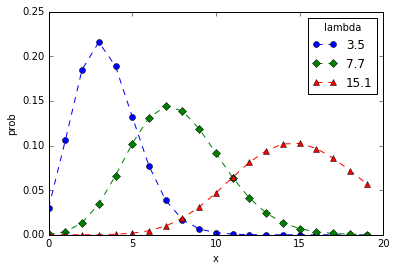

In [27]:
x = np.arange(0,20)
plt.plot(pd.Series(stats.poisson.pmf(x,3.5),index=x),'o--',label=3.5)
plt.plot(pd.Series(stats.poisson.pmf(x,7.7),index=x),'D--',label=7.7)
plt.plot(pd.Series(stats.poisson.pmf(x,15.1),index=x),'^--',label=15.1)
plt.legend(loc='upper right',title='lambda')
plt.xlabel('x')
plt.ylabel('prob')
plt.show()

### ポアソン分布のパラメータの最尤推定
最尤推定法は尤度なる「当てはまりの良さ」を表す統計量を最大にするようなパラメータの値を探そうとするパラメータ推定法です。

尤度の実態はある$\lambda$の値を決めた時に、すべての個体iについての$p(y_{i}|\lambda)$の積です。

なぜ積かというとy1が２である、かつ、y2が2であるかつ・・・と50個の事象が同時に真である確率を計算したいからである。

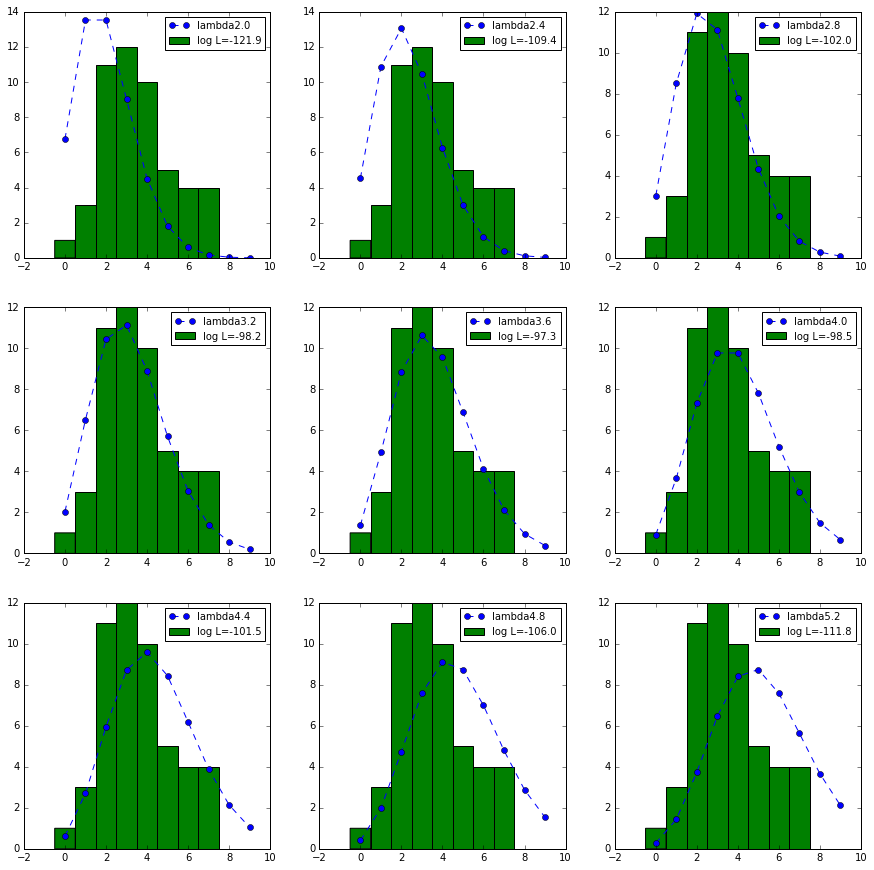

In [37]:
x = np.arange(0,10)

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3,3,1)
t_lambda = 2.0
ax1.plot(pd.Series(stats.poisson.pmf(x,t_lambda),index=x)*50,'o--',label='lambda%.1f' % t_lambda)
ax1.hist(data,bins=np.arange(-0.5,8.5,1.0),label='log L=%.1f' % sum(stats.poisson.logpmf(data,t_lambda)))
ax1.legend(loc='upper right',fontsize=10)

ax2 = fig.add_subplot(3,3,2)
t_lambda = 2.4
ax2.plot(pd.Series(stats.poisson.pmf(x,t_lambda),index=x)*50,'o--',label='lambda%.1f' % t_lambda)
ax2.hist(data,bins=np.arange(-0.5,8.5,1.0),label='log L=%.1f' % sum(stats.poisson.logpmf(data,t_lambda)))
ax2.legend(loc='upper right',fontsize=10)

ax3 = fig.add_subplot(3,3,3)
t_lambda = 2.8
ax3.plot(pd.Series(stats.poisson.pmf(x,t_lambda),index=x)*50,'o--',label='lambda%.1f' % t_lambda)
ax3.hist(data,bins=np.arange(-0.5,8.5,1.0),label='log L=%.1f' % sum(stats.poisson.logpmf(data,t_lambda)))
ax3.legend(loc='upper right',fontsize=10)

ax4 = fig.add_subplot(3,3,4)
t_lambda = 3.2
ax4.plot(pd.Series(stats.poisson.pmf(x,t_lambda),index=x)*50,'o--',label='lambda%.1f' % t_lambda)
ax4.hist(data,bins=np.arange(-0.5,8.5,1.0),label='log L=%.1f' % sum(stats.poisson.logpmf(data,t_lambda)))
ax4.legend(loc='upper right',fontsize=10)

ax5 = fig.add_subplot(3,3,5)
t_lambda = 3.6
ax5.plot(pd.Series(stats.poisson.pmf(x,t_lambda),index=x)*50,'o--',label='lambda%.1f' % t_lambda)
ax5.hist(data,bins=np.arange(-0.5,8.5,1.0),label='log L=%.1f' % sum(stats.poisson.logpmf(data,t_lambda)))
ax5.legend(loc='upper right',fontsize=10)

ax6 = fig.add_subplot(3,3,6)
t_lambda = 4.0
ax6.plot(pd.Series(stats.poisson.pmf(x,t_lambda),index=x)*50,'o--',label='lambda%.1f' % t_lambda)
ax6.hist(data,bins=np.arange(-0.5,8.5,1.0),label='log L=%.1f' % sum(stats.poisson.logpmf(data,t_lambda)))
ax6.legend(loc='upper right',fontsize=10)

ax7 = fig.add_subplot(3,3,7)
t_lambda = 4.4
ax7.plot(pd.Series(stats.poisson.pmf(x,t_lambda),index=x)*50,'o--',label='lambda%.1f' % t_lambda)
ax7.hist(data,bins=np.arange(-0.5,8.5,1.0),label='log L=%.1f' % sum(stats.poisson.logpmf(data,t_lambda)))
ax7.legend(loc='upper right',fontsize=10)

ax8 = fig.add_subplot(3,3,8)
t_lambda = 4.8
ax8.plot(pd.Series(stats.poisson.pmf(x,t_lambda),index=x)*50,'o--',label='lambda%.1f' % t_lambda)
ax8.hist(data,bins=np.arange(-0.5,8.5,1.0),label='log L=%.1f' % sum(stats.poisson.logpmf(data,t_lambda)))
ax8.legend(loc='upper right',fontsize=10)

ax9 = fig.add_subplot(3,3,9)
t_lambda = 5.2
ax9.plot(pd.Series(stats.poisson.pmf(x,t_lambda),index=x)*50,'o--',label='lambda%.1f' % t_lambda)
ax9.hist(data,bins=np.arange(-0.5,8.5,1.0),label='log L=%.1f' % sum(stats.poisson.logpmf(data,t_lambda)))
ax9.legend(loc='upper right',fontsize=10)

plt.show()

尤度の最大値を求める

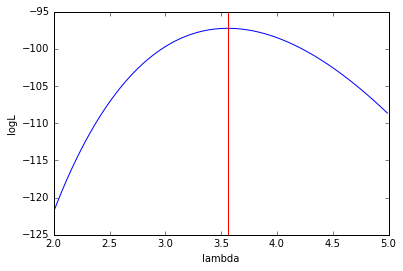

最大尤度：3.6


In [43]:
x = np.arange(2.0,5.0,0.01)
logL = np.array([sum(stats.poisson.logpmf(data,i)) for i in x]) #lambda毎の尤度
plt.plot(x,logL)
plt.axvline(x=x[np.argmax(logL)],color='red')
plt.xlabel('lambda')
plt.ylabel('logL')
plt.show()
print("最大尤度：%.1f" % x[np.argmax(logL)])

### 最大尤度の分布
平均3.5のポアソン分布に従う乱数50個の集団を、3000回発生させて、毎回最大尤度を計算し、最大尤度の分布を見る。

In [63]:
likewoods = []
for j in range(3000): 
    data_a = np.random.poisson(3.5,50)
    x = np.arange(2.0,5.0,0.01)
    logL = np.array([sum(stats.poisson.logpmf(data_a,i)) for i in x])
    likewoods.append(x[np.argmax(logL)])

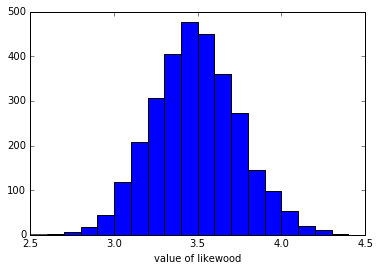

In [66]:
plt.hist(likewoods,bins=np.arange(2.5,4.5,0.1))
plt.xlabel('value of likewood')
plt.show()